In [28]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

## Problem Number 1

In [12]:
# Define Environment
class Environment:
    def __init__(self, bus_capacity, cost_deploy, cost_person, station_capacity
                     , gamma, possible_actions, arrival_at_station):
        # capacity
        self.bus_capacity = bus_capacity
        self.station_capacity=station_capacity
        
        # cost         
        self.cost_deploy = cost_deploy
        self.cost_person = cost_person

        # action and state space
        self.state_space = np.arange(0, self.station_capacity+1)
        self.action_space = np.array(possible_actions)
        
        # status of station
        uniform_probability=1/len(arrival_at_station)
        temp = [[i,uniform_probability] for i in arrival_at_station]
        self.arrival=np.matrix(temp)
        
        # discount
        self.gamma = gamma

    def reward(self, action, state):
        return action*self.cost_deploy+state*self.cost_person
    
    def check_station_capacity(self,state, action):
        return state>self.station_capacity

In [13]:
# Next step and calculate value
def next_step(state, Value, env):
        values_at_step = np.zeros(env.action_space.shape[0])
        
        for action in env.action_space:
            if env.check_station_capacity(state,action) and action==0:
                # very large negative value so it is not optimal                 
                values_at_step[action] = -100000000
                continue
            
            # states
            state_after_action = state-action*min(env.bus_capacity,state)
            next_possible_states = env.arrival+np.array([state_after_action,0])

            # value calculation
            expected_value=0
            for nps in next_possible_states:
                # next possible state cannot be over station_capcity                 
                if nps[0,0]<env.state_space.shape[0]:
                    expected_value +=  env.gamma * Value[int(nps[0,0])]*nps[0,1]
                else:
                    break
            
            calc_value=env.reward(action, state_after_action)+expected_value
            values_at_step[action] = calc_value
        # retrun values            
        return values_at_step

In [14]:
# Call environment object
env1=Environment(bus_capacity=15, cost_deploy= -100, cost_person= -2, station_capacity=200
                , gamma = 0.95, possible_actions=[0,1], arrival_at_station = [1,2,3,4,5])

### Problem 1.A

In [15]:
def enumeration(T, env):
    Value = np.zeros(shape=(T+1,env.state_space.shape[0]))
    
    for t in range(T-1, -1, -1):
        for state in env.state_space:
            values_at_step = next_step(state, Value[t+1], env)
            Value[t][state] = max(values_at_step)
            
    return Value

In [16]:
enumeration_Value = enumeration(500,env1)

Text(0, 0.5, 'Value')

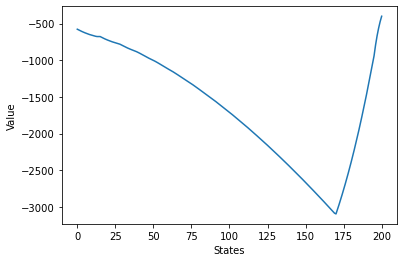

In [17]:
plt.plot(env1.state_space, enumeration_Value[0])
plt.xlabel('States')
plt.ylabel("Value")

### Problem 1.B

In [18]:
def value_iteration(T, env):
    Value = np.zeros(env.state_space.shape[0])

    for t in range(0,T):        
        for state in env.state_space:
            value_at_step = next_step(state, Value, env)
            max_value = np.max(value_at_step)
            Value[state] = max_value
    
    return Value

In [19]:
# To estimate limit as T goes to infinity, choose large number for T
value_Value = value_iteration(1000,env1)

Text(0, 0.5, 'Value')

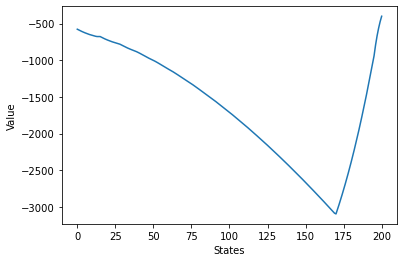

In [20]:
plt.plot(env1.state_space, Value)
plt.xlabel('States')
plt.ylabel("Value")

### Problem 1.C

In [21]:
def policy_evaluation(improvement_threshold, policy, env):    
    Value = np.zeros(env.state_space.shape[0])
    
    while True:
        improvement = 0
        for state in env.state_space:
            value = 0
            for action, action_prob in enumerate(policy[state]):
                if env.check_station_capacity(state,action):
                    action_prob = 1 if action == 1 else 0
                    
                state_after_action = state - action * min(env.bus_capacity, state)
                next_possible_states = env.arrival+np.array([state_after_action,0])
                
                for nps in next_possible_states:
                    if nps[0,0]<env.state_space.shape[0]:
                        if action_prob != 0:
                            value += action_prob * nps[0,1] * (env.reward(action, state_after_action) + env.gamma * Value[int(nps[0,0])])
                    else:
                        break
                
                improvement = max(improvement, np.abs(value - Value[state]))                
                Value[state] = value
        
        if improvement < improvement_threshold:
            break

    return Value

In [22]:
def policy_improvement(env):
    policy_space = np.ones([env.state_space.shape[0], env.action_space.shape[0]]) / env.action_space.shape[0]

    while True:
        Value = policy_evaluation(0.1,policy_space, env)
        policy_stable = True
        
        for state in env.state_space:
            action = np.argmax(policy_state[state])
            
            action_values = next_step(state, Value, env)
            best_action = np.argmax(action_values)
            
            if action != best_action:
                policy_stable = False
            policy_space[s] = np.eye(env.action_space.shape[0])[best_action]
        
        if policy_stable:
            return  np.array([j for i,j in policy]), Value

In [23]:
# Functions failed to run, and timed out. I do not know if this is a convergence issue, or some error in the code
_, policy_Value = policy_improvement(env1)

KeyboardInterrupt: 

In [ ]:
plt.plot(env1.state_space, policy_Value)
plt.xlabel('States')
plt.ylabel("Value")

## Problem 2

Even though  I developed the code for the new environment and the code to get Value for each step, I noticed that the program is not runnable due to a vast state_space and subsequently, Value space. The state_space is now exponentially bigger than that of problem number 1 (101^5), and solving problems using these algorithms is impossible due to the memory constraint. A new method needs to be implemented to solve this new problem 

In [24]:
class Environment_2:
    def __init__(self, bus_capacity, cost_deploy, cost_person, station_capacity
                     , gamma, possible_actions, arrival_at_station):
        # capacity
        self.bus_capacity = bus_capacity
        self.station_capacity=station_capacity
        
        # cost         
        self.cost_deploy = cost_deploy
        self.cost_person = cost_person

        # action and state space
        temp = [list(range(0, self.station_capacity+1)) for i in range(0,len(cost_person))]
        self.state_space = list(itertools.product(*temp))            
        self.action_space = np.array(possible_actions)
        
        # status of station
        uniform_probability=1/len(arrival_at_station)
        temp = [[i,uniform_probability] for i in arrival_at_station]
        self.arrival=np.matrix(temp)
        
        # discount
        self.gamma = gamma

    def reward(self, action, state):
        return action*self.cost_deploy+state*self.cost_person
    
    def check_station_capacity(self,state, action):
        return state>self.station_capacity

In [26]:
def next_step_2(state, Value, env):
        values_at_step = np.zeros(env.action_space.shape[0])
        
        for action in env.action_space:
            if env.check_station_capacity(state,action) and action==0:
                values_at_step[action] = -100000000
                continue
            
            # states
            boarding=action*env.bus_capacity
            possible_states=list(state)
            
            for index,state in enumerate(state):
                if boarding<=state:
                    possible_states[i]=state-boarding
                    break
                else:
                    possible_states[i]=0
                    boarding -= state
            
            state_after_action = possible_states
            next_possible_states = next_states_helper(possible_states, action, env)

            # value calculation
            expected_value=0
            for nps in next_possible_states:
                if nps[0,0]<env.state_space.shape[0]:
                    expected_value +=  env.gamma * Value[int(nps[0,0])]*nps[0,1]
                else:
                    break
            
            calc_value=env.reward(action, state_after_action)+expected_value
            values_at_step[action] = calc_value
            
        return values_at_step

In [27]:
def next_states_helper(possible_states, action, env):  
    new_state = [[st+ar[0,0] for ar in env.arrival] for st in possible_states] 
    all_state = {i:env.p**env.n_types for i in env.state_space}
    
    temp_dict = {}
    for state in list(all_state):
        temp_state = tuple(min(env.station_capacity,st) for st in state)
        if temp_state != state:
            if temp_state in temp_dict:
                temp_dict[temp_state] += all_state.pop(state)     
            else:
                temp_dict[temp_state] = all_state.pop(state)
                
    for state in temp_dict:
        if state in all_state:
            all_state[state] += temp_dict[state] 
        else:
            all_state[state] = temp_dict[state] 
    return all_state

In [ ]:
env2=Environment_2(bus_capacity=30, cost_deploy= -100, cost_person= [1, 1.5, 2, 2.5, 3], station_capacity=100
                    , gamma = 0.95, possible_actions=[0,1], arrival_at_station = [1,2,3,4,5])

### a) Enumeration

In [10]:
enumeration2_value=enumeration(500,env)


KeyboardInterrupt



### b) Value Iteration

In [ ]:
value2_Value=value_iteration(1000,env2)

### C) Policy Iteration

In [ ]:
_, policy2_Value = policy_improvement(env2)